<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Employee_churn_rate_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score

DATA EXTRACTION

---

In [4]:
employee = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/Classification/Employee.csv")
employee.head(2), employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


(   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
 0  Bachelors         2017  Bangalore            3   34    Male          No   
 1  Bachelors         2013       Pune            1   28  Female          No   
 
    ExperienceInCurrentDomain  LeaveOrNot  
 0                          0           0  
 1                          3           1  ,
 None)

DATA PREPROCESSING

---

In [13]:
employ = employee.copy()

In [14]:
enc = LabelEncoder()

obj = employ.select_dtypes(include='object').columns
for i in obj:
  employ[i] = enc.fit_transform(employ[i])
employ.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1


DATA ANALYSIS

---

In [15]:
sns.set()

In [21]:
def plot_stype(data, column1, column2=None, plot_type='hist', **kwargs):
  plt.figure(figsize=(15,5))
  if plot_type=='hist':
    sns.histplot(data=data, x=column1, kde=True, kde_kws=dict(cut=3), **kwargs)
  elif plot_type=='box':
    sns.boxplot(data=data, x=column1, y=column2, **kwargs)
  elif plot_type=='scatter':
    sns.scatterplot(data=data, x=column1, y=column2, **kwargs)
  else:
    raise ValueError(f"Plot Type Unmakeble {plot_type}")
  plt.show()

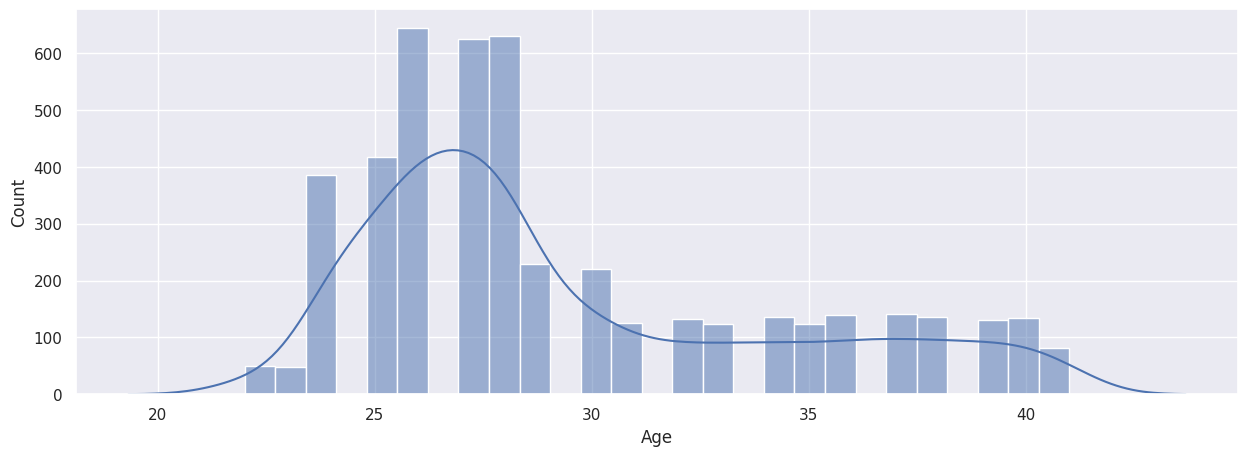

In [25]:
plot_stype(employee, column1='Age', plot_type='hist')

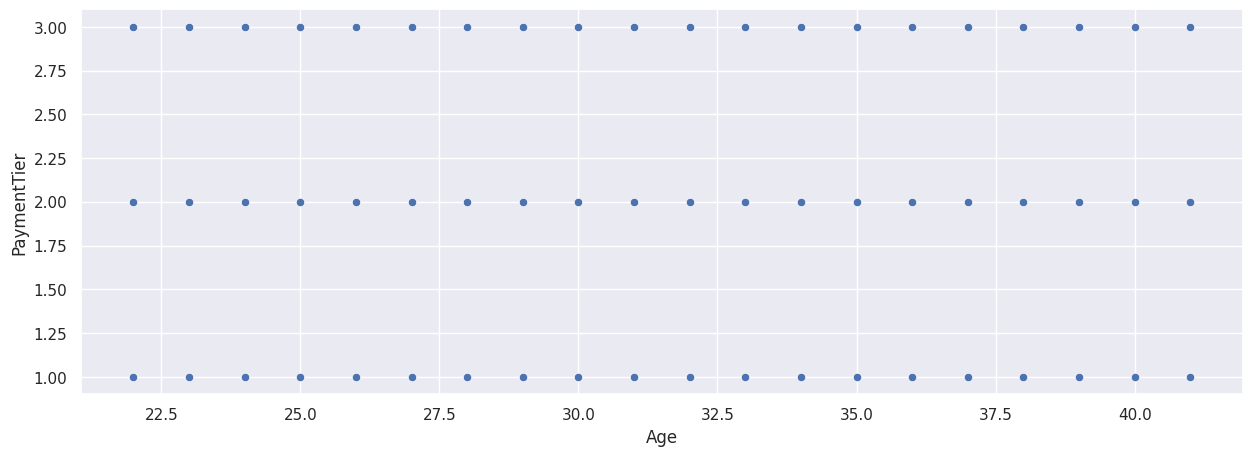

In [27]:
plot_stype(employee, column1='Age', column2='PaymentTier', plot_type='scatter')

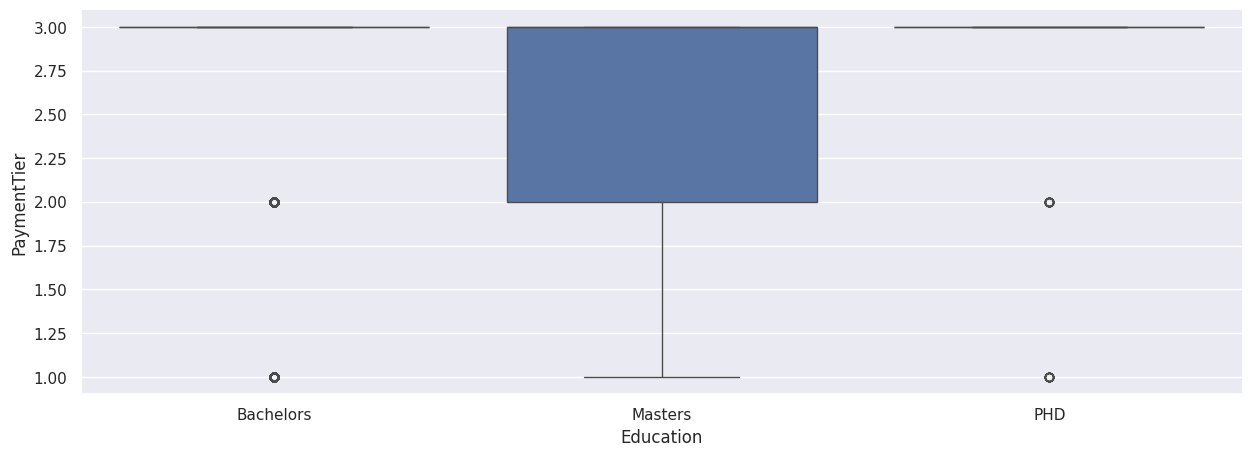

In [29]:
plot_stype(employee, column1='Education', column2='PaymentTier', plot_type='box')

In [30]:
corr = employ.corr()
print(corr['LeaveOrNot'].sort_values(ascending=False).round(3)*100)

LeaveOrNot                  100.00
City                         20.10
JoiningYear                  18.20
Education                     8.00
EverBenched                   7.80
ExperienceInCurrentDomain    -3.10
Age                          -5.10
PaymentTier                 -19.80
Gender                      -22.10
Name: LeaveOrNot, dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [31]:
X = employ.iloc[:,:-1]
y = employ.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

clasf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clasf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

[LightGBM] [Info] Number of positive: 1279, number of negative: 2443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 3722, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343632 -> initscore=-0.647148
[LightGBM] [Info] Start training from score -0.647148


In [36]:
models.head()

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.85,0.82,0.82,0.85,0.38
LGBMClassifier,0.85,0.82,0.82,0.85,0.13
RandomForestClassifier,0.85,0.82,0.82,0.84,0.43
DecisionTreeClassifier,0.84,0.81,0.81,0.84,0.02
BaggingClassifier,0.84,0.81,0.81,0.84,0.08


In [40]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [41]:
test_pred = clf.predict(X_test)
acc_scr = accuracy_score(y_test, test_pred)
print(f"accuracy score for test is {acc_scr}")

imp = clf.feature_importances_.round(3)*100
col = X.columns
feat_imp = pd.DataFrame({'Feature': col,
                         'Importance': imp}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance")
print(feat_imp)

accuracy score for test is 0.849624060150376

Feature Importance
                     Feature  Importance
1                JoiningYear       29.80
4                        Age       17.30
2                       City       12.60
3                PaymentTier       10.20
7  ExperienceInCurrentDomain        9.90
0                  Education        9.80
5                     Gender        8.70
6                EverBenched        1.80
